## **Prime Video**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


1.1 Visual general de los datos

In [2]:
data_amazon = pd.read_csv('../src:data/Data_Amazon/datos_amazon.csv')

print("Filas, columnas:", data_amazon.shape)
data_amazon.head()

Filas, columnas: (9871, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [3]:
# Tipo de dato
data_amazon.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_amazon.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [5]:
#Nulls en porcentaje
for i in data_amazon.isna().sum():

    print((i/data_amazon.shape[0])*100)

#Destacamos que el 86% de los valores de la columna season son nulos, pero como representan el numero de temporadas, no nos importa mucho, y podría tener sentido
#También destacamos que el 65% de los valores de age_certification son nulos, podría no ser muy útil esta columna

0.0
0.0
0.0
1.2055516158443926
0.0
65.71775909229055
0.0
0.0
0.0
86.25265930503495
6.757167460237058
10.343430250227941
10.44473710870226
5.541485158545234
21.092087934353156


<AxesSubplot:>

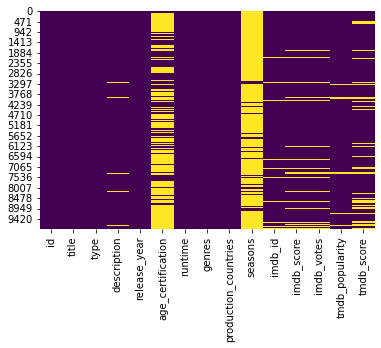

In [6]:
sns.heatmap(data_amazon.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: (object - string) ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores


In [7]:
print(data_amazon.columns)
print("N columnas:", len(data_amazon.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [8]:
# Título
# Cada título representa un contenido 'único' de la plataforma
# Comprobamos que no haya duplicados o valores nulos 
# -- si hubiese valores nulo en el campo título tendríamos que escrapear el titulo por los ids de JustWatch o imdb:

print('Tipo de dato:', data_amazon['title'].dtype)
print("n valores nulos:", data_amazon['title'].isnull().sum())
titulos_duplicados = data_amazon.loc[data_amazon.duplicated(['title'])]
print("n titulos duplicados:", titulos_duplicados.shape[0])
titulos_unicos = data_amazon['title'].nunique()
print("valores repetidos:", data_amazon.shape[0] - titulos_unicos)

Tipo de dato: object
n valores nulos: 0
n titulos duplicados: 134
valores repetidos: 134


In [9]:
# Tenemos 134 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y contenido:

print("n duplicados:", data_amazon[data_amazon.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_amazon[data_amazon.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

n duplicados: 4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
9761,tm1102439,Udanpirappe,MOVIE,A woman hopes for the reunion of two families ...,2021,NaN,137,['drama'],['IN'],NaN,NaN,NaN,NaN,1.579,5.0


In [10]:
# Eliminamos los 4 duplicados y reseteamos el indice para que no haya saltos
data_amazon1 = data_amazon.drop_duplicates(subset=None, keep="first").reset_index(drop = True).copy()

In [11]:
# Comprobamos que ya no tenemos duplicados:
print("n duplicados:", data_amazon1[data_amazon1.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])

n duplicados: 1


In [12]:
# Vemos el título del duplicado que no se ha eliminado:
data_amazon1[data_amazon1.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

# Comprobamos -visualmente- si es un duplicado:
data_amazon1[data_amazon1['title'] == 'Udanpirappe']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9557,tm1090237,Udanpirappe,MOVIE,A woman hopes for the reunion of two families ...,2021,NaN,137,['drama'],[],NaN,tt15175418,5.1,871.0,NaN,NaN
9758,tm1102439,Udanpirappe,MOVIE,A woman hopes for the reunion of two families ...,2021,NaN,137,['drama'],['IN'],NaN,NaN,NaN,NaN,1.579,5.0


In [13]:
# Nos aseguramos que todos los valores de esas columnas tengan el mismo tipo

data_amazon1['title'] = data_amazon1['title'].astype(str)
data_amazon1['release_year'] = data_amazon1['release_year'].astype(int)
data_amazon['runtime'] = data_amazon['runtime'].astype(float)

print(data_amazon1['title'].dtype)

# Nos aseguramos que data_amazon1['title'] es un string
print(data_amazon1[data_amazon1['title'] == 'Udanpirappe'].select_dtypes(include=['object']).applymap(type))

print(data_amazon1['release_year'].dtype)
print(data_amazon1['runtime'].dtype)

# Volvemos a intentar eliminar el duplicado
data_amazon2 = data_amazon1.drop_duplicates(subset=['title', 'type', 'release_year', 'runtime'], keep="first").copy()

# Comprobamos que solo hay una fila con la película Udanpirappe de 2021:
data_amazon2[data_amazon2['title'] == 'Udanpirappe']

object
                 id          title           type    description  \
9557  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   
9758  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

     age_certification         genres production_countries          imdb_id  
9557   <class 'float'>  <class 'str'>        <class 'str'>    <class 'str'>  
9758   <class 'float'>  <class 'str'>        <class 'str'>  <class 'float'>  
int64
int64


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9557,tm1090237,Udanpirappe,MOVIE,A woman hopes for the reunion of two families ...,2021,NaN,137,['drama'],[],NaN,tt15175418,5.1,871.0,NaN,NaN


In [14]:
# Comprobamos que ya no tenemos duplicados:
print("n duplicados:", data_amazon2[data_amazon2.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])

n duplicados: 0


In [15]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_amazon3 = data_amazon2.drop(['imdb_id', 'description'], axis=1).copy()
print("N columnas:", data_amazon3.shape[1])
data_amazon3.head()

N columnas: 13


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,7.9,30924.0,8.273,7.6


In [16]:
data_amazon3.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [17]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y diferenciar por contenido exclusivo 
# (por eso no eliminamos esta columna)

print("Valores unicos:", data_amazon3['id'].nunique())
print("n filas:", data_amazon3['id'].shape[0])

Valores unicos: 9867
n filas: 9867


In [18]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos: lo hacemos al final, para cambiar las columnas del resto de vbles a la vez
data_amazon3['type'] = data_amazon3['type'].astype(str)
data_amazon3['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [19]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_amazon3['release_year'] // 10)).astype(str) + 's'
data_amazon3.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_amazon3['release_year']

In [20]:
data_amazon3.head()

,id,title,type,Decada,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1930s,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,1920s,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1940s,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,1940s,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,1950s,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,7.9,30924.0,8.273,7.6


In [21]:
df_decadas_amazon = pd.DataFrame(data_amazon3['Decada'].value_counts())
total = df_decadas_amazon['Decada'].sum()
df_decadas_amazon['total'] = [round((i/total)*100, 2) for i in df_decadas_amazon['Decada']]
df_decadas_amazon

# Tiene sentido que 2020s sea solo el 16.64% ya que solo hay 2 años, pero viendo el crecimiento de 2000 a 2010, prob prevision superar 2010

,Decada,total
2010s,4315,43.73
2020s,1642,16.64
2000s,1189,12.05
1990s,546,5.53
1940s,420,4.26
1930s,414,4.20
1980s,408,4.13
1970s,355,3.60
1950s,254,2.57
1960s,239,2.42


In [22]:
# age_certification -> vemos variables para redefinirlas
print("Valores Columna Edad:", data_amazon3['age_certification'].unique())

Valores Columna Edad: ['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


In [23]:
# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 publico general 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 6487 NaN --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "G", 0, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-G", 0, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-Y", 7, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-Y7", 7, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-PG", 7, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "PG", 7, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "PG-13", 13, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-14", 13, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "R", 17, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "NC-17", 17, data_amazon3['age_certification'])
data_amazon3['age_certification'] = np.where(data_amazon3['age_certification'] == "TV-MA", 17, data_amazon3['age_certification'])

# Asignamos el numero 9999 a los valores nulos:
data_amazon3['age_certification'] = data_amazon3['age_certification'].fillna(9999)

print("Valores Columna Edad:", data_amazon3['age_certification'].unique())

Valores Columna Edad: [   7 9999    0   13   17]


In [24]:
df_edades_amazon = pd.DataFrame(data_amazon3['age_certification'].value_counts())
total = data_amazon3['age_certification'].value_counts().sum()
df_edades_amazon['total'] = [round((i/total)*100, 2) for i in df_edades_amazon['age_certification']]
df_edades_amazon

,age_certification,total
9999,6483,65.70
17,1479,14.99
7,803,8.14
13,776,7.86
0,326,3.30


In [25]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_amazon3['genres']:
    if "[]" in i:
        nan_genres +=1
        
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_amazon3.shape[0] *100, 2))

N NaN en 'genres': 209
% NaN en 'genres': 2.12


In [26]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_amazon3['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [27]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['comedy' 'family' 'animation' 'action' 'fantasy' 'horror' 'drama' 'war'
 'western' 'european' 'romance' 'thriller' 'crime' 'history' 'sport'
 'scifi' 'documentation' 'music' 'reality']
n generos: 19


In [28]:
print(data_amazon3['genres'].dtype) # --> object
print(data_amazon3['genres'].iloc[0])
type(data_amazon3['genres'].iloc[0]) #-->str
print(data_amazon3['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']
[


In [29]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_amazon3['genres'] = data_amazon3['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_amazon3['genres'] = data_amazon3['genres'].str.rsplit(pat=", ")
data_amazon3['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'comedy'

In [30]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista

data_amazon3['genres'] = [fila[0] for fila in data_amazon3['genres']]

In [31]:
df_generos_amazon = pd.DataFrame(data_amazon3['genres'].value_counts())
total = df_generos_amazon['genres'].sum()
print("N generos:", total)
df_generos_amazon['total'] = [round((i/total)*100, 2) for i in df_generos_amazon['genres']]
df_generos_amazon

N generos: 9867


,genres,total
drama,2625,26.60
comedy,1608,16.30
thriller,1101,11.16
documentation,776,7.86
horror,610,6.18
action,527,5.34
romance,492,4.99
western,413,4.19
scifi,325,3.29
crime,300,3.04


In [32]:
df_generos_amazon['genres'].astype(str)

drama            2625
comedy           1608
thriller         1101
documentation     776
horror            610
action            527
romance           492
western           413
scifi             325
crime             300
animation         232
                  209
fantasy           198
family            134
reality           102
music              93
war                51
history            46
sport              19
european            6
Name: genres, dtype: object

In [33]:
len(df_generos_amazon['genres'][df_generos_amazon['genres'] == ""])

0

In [34]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_amazon3['production_countries']:
    if "[]" in i:
        nan_countries +=1

print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_amazon3.shape[0] *100, 2))

N NaN en 'production_countries': 821
% NaN en 'production_countries': 8.32


In [35]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_amazon3['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [36]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'GB' 'MX' 'CA' 'DE' 'SU' 'IN' 'XX' 'IT' 'JP' 'FR' 'HK' 'ES' 'IL'
 'AU' 'CH' 'IE' 'GR' 'CN' 'PH' 'NL' 'YU' 'CI' 'PR' 'LI' 'KR' 'XC' 'HU'
 'TW' 'AN' 'MC' 'CO' 'RO' 'EG' 'TR' 'BE' 'ZA' 'PT' 'CL' 'SE' 'BR' 'DK'
 'NZ' 'RU' 'LU' 'CZ' 'FI' 'AT' 'SK' 'AR' 'VE' 'TH' 'PL' 'AE' 'SI' 'BA'
 'ID' 'NO' 'AF' 'IR' 'IS' 'BG' 'JM' 'RS' 'SZ' 'LT' 'TC' 'SG' 'UY' 'BO'
 'UA' 'MY' 'TN' 'QA' 'NG' 'KZ' 'GQ' 'MT' 'SO' 'KE'
 'United States of America' 'MA' 'VN' 'BD' 'FJ' 'MN' 'UG' 'TT' 'PK' 'XK'
 'PE' 'DO' 'SV' 'GE' 'PS' 'HR' 'LV' 'AQ' 'LB' 'KH' 'CR' 'BM' 'JO' 'PA'
 'AL' 'CY' 'CU' 'PY' 'EE' 'ET' 'PF' 'EC' 'IO' 'AM' 'SY' 'CM' 'LY']
n paises: 117


In [37]:
#Cambiamos ''United States of America' por 'US'
data_amazon3['production_countries'].loc[data_amazon3['production_countries'] == 'United States of America'] = 'US'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
data_amazon3['production_countries'][0]

"['US']"

In [39]:
#Eliminamos corchetes y comillas
data_amazon3['production_countries'] = data_amazon3['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_amazon3['production_countries'][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'US'

In [40]:
df_paises_amazon = pd.DataFrame(data_amazon3['production_countries'].value_counts())
total_paises = df_paises_amazon['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_amazon['total'] = [round((i/total_paises)*100, 2) for i in df_paises_amazon['production_countries']]
df_paises_amazon

N paises produccion: 9867


,production_countries,total
US,4807,48.72
IN,1047,10.61
,821,8.32
GB,667,6.76
CA,321,3.25
...,...,...
TC,1,0.01
"FR, US, DE",1,0.01
"PL, SK, CZ",1,0.01
"PL, IL",1,0.01


In [41]:
n_varios_paises = 0

for fila in data_amazon3['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 876
Porcentaje: 8.88


In [42]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_amazon3['production_countries'] = [i[:2] for i in data_amazon3['production_countries'] if int(len(data_amazon3['production_countries']) > 2)]

In [43]:
df_paises_un_amazon = pd.DataFrame(data_amazon3['production_countries'].value_counts())
total_un_paises = df_paises_un_amazon['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_amazon['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_amazon['production_countries']]
df_paises_un_amazon

N paises produccion: 9867


,production_countries,total
US,4999,50.66
IN,1057,10.71
,821,8.32
GB,777,7.87
CA,430,4.36
...,...,...
UG,1,0.01
AN,1,0.01
LT,1,0.01
SO,1,0.01


In [44]:
# Sacamos el los paises y el n paises final
print(data_amazon3['production_countries'].unique())
print(data_amazon3['production_countries'].nunique())

['US' 'GB' 'MX' 'DE' 'SU' '' 'IN' 'CA' 'XX' 'JP' 'IT' 'HK' 'FR' 'ES' 'IL'
 'AU' 'CH' 'GR' 'PH' 'NL' 'PR' 'YU' 'XC' 'TW' 'AN' 'RO' 'EG' 'BE' 'ZA'
 'KR' 'PT' 'SE' 'BR' 'DK' 'NZ' 'CN' 'RU' 'FI' 'AT' 'IE' 'SK' 'VE' 'TH'
 'ID' 'NO' 'IS' 'AR' 'BG' 'JM' 'RS' 'LU' 'CL' 'SZ' 'PL' 'TC' 'SG' 'CZ'
 'UY' 'UA' 'HU' 'BO' 'MY' 'TR' 'TN' 'AF' 'NG' 'LT' 'SO' 'Un' 'MA' 'VN'
 'BD' 'MN' 'KE' 'UG' 'TT' 'PK' 'XK' 'PE' 'DO' 'CO' 'SV' 'HR' 'LV' 'LB'
 'KH' 'CR' 'IR' 'BM' 'JO' 'PA' 'AL' 'PY' 'PS' 'SI' 'PF' 'IO' 'CU' 'SY'
 'CM' 'EE' 'KZ']
102


In [45]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma

data_amazon3['seasons'] = data_amazon3['seasons'].fillna(1)
data_amazon3['seasons'] = data_amazon3['seasons'].astype(int)

In [46]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas 
print(len(data_amazon3[data_amazon3['imdb_score'].isna() == True]['imdb_votes']))

1020


In [47]:
# columna imdb_score --> 1020 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico -con los datos que tenemos ahora mismo
# Intentamos rellenar con la columna de tmdb

data_amazon3['imdb_score'] = data_amazon3['imdb_score'].fillna(data_amazon3['tmdb_popularity'])
len(data_amazon3[data_amazon3['imdb_score'].isna() == True])

# Quedan 219 datos NaN por rellenar --> rellenamos con 0 --> poner otro número asignaría una puntuación no real a un título
data_amazon3['imdb_score'] = data_amazon3['imdb_score'].fillna(0)
data_amazon3['imdb_score'] = data_amazon3['imdb_score'].astype(float)
len(data_amazon3[data_amazon3['imdb_score'].isna() == True])

0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas por si cambiase de opinion 

In [48]:

#columna ibdb_votes --> 1030 nulos
# de 1030 nulos, 1020 tampoco tenían puntuación
# por lo que solo afectará a 10 titulos el relleno de los nulos
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_amazon3['imdb_votes'].mean())
data_amazon3['imdb_votes'] = data_amazon3['imdb_votes'].fillna(data_amazon3['imdb_votes'].mean())
data_amazon3['imdb_votes'] = data_amazon3['imdb_votes'].astype(int)


Rellenamos null con la media de votos: 8536.485119384406


In [49]:
# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_amazon3['imdb_votes'].mean(), 2) for i in data_amazon3['imdb_votes']]
data_amazon3.insert(11, 'Var_Votos', var_votos)



In [50]:
# columna tmdb_score --> 2080 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener esta puntuación es comparar y ver que no están sesgados los datos de Imbd
# Le designamos el valor 0 para que no afecte
data_amazon3['tmdb_score'] = data_amazon3['tmdb_score'].fillna(0)
data_amazon3['tmdb_score'] = data_amazon3['tmdb_score'].astype(float)


In [51]:

# columna tmdb_popularity --> 547 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 
# Le designamos el valor 6666 para saber que esos datos son los nulos
data_amazon3['tmdb_popularity'] = data_amazon3['tmdb_popularity'].fillna(0)
data_amazon3['tmdb_popularity'] = data_amazon3['tmdb_popularity'].astype(float)


In [52]:
data_amazon4 = data_amazon3.drop(['imdb_votes','Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [53]:
data_amazon4.columns

Index(['id', 'title', 'type', 'Decada', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'tmdb_score'],
      dtype='object')

In [54]:
# renombramos las columnas

data_amazon4.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [55]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_amazon4.shape)
data_amazon4.info()

Filas, columnas: (9867, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9867
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           9867 non-null   object 
 1   Titulo       9867 non-null   object 
 2   Tipo         9867 non-null   object 
 3   Decada       9867 non-null   object 
 4   Edad_Recom   9867 non-null   int64  
 5   Duracion     9867 non-null   int64  
 6   Generos      9867 non-null   object 
 7   Paises_Prod  9867 non-null   object 
 8   Temporadas   9867 non-null   int64  
 9   Imdb_Puntos  9867 non-null   float64
 10  Tmdb_Puntos  9867 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.2+ MB


In [56]:
# Hemos eliminado 4 filas por duplicados: de un csv de 9871 titulos, pasamos a uno con 9867
n_titulos_sacados = data_amazon.shape[0] - data_amazon4.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_amazon.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

4
0.04


In [57]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

amazon_series_df = data_amazon4[data_amazon4['Tipo']=='SHOW']
amazon_series_df = amazon_series_df.reset_index(drop = True)
print("n_filas_series:", amazon_series_df.shape[0])

n_filas_series: 1357


In [58]:
# Eliminamos la columna de tipo porque ya no nos interesa
del amazon_series_df['Tipo']

In [59]:
amazon_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts20945,The Three Stooges,1930s,7,19,comedy,US,26,8.6,7.6
1,ts55748,What's My Line?,1950s,9999,30,reality,US,18,8.6,6.9
2,ts20005,I Love Lucy,1950s,0,30,comedy,US,9,8.5,8.1
3,ts42867,Mister Rogers' Neighborhood,1960s,7,29,fantasy,US,31,8.7,4.7
4,ts21930,Lupin the Third,1970s,13,23,scifi,JP,6,7.9,8.0


In [60]:
amazon_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
1352,ts302433,Aham Bhramhasmi,2020s,9999,25,,,1,1.816,0.0
1353,ts320425,Funny Little Stories,2020s,9999,28,comedy,PT,1,0.600,0.0
1354,ts273173,Exquisite Wolf Heart,2020s,9999,46,drama,CN,1,12.879,6.0
1355,ts295958,GameOn Titans,2020s,9999,17,,,1,0.000,0.0
1356,ts275838,Waking Up Eighty,2020s,9999,10,drama,,1,0.000,0.0


In [61]:
amazon_peliculas_df = data_amazon4[data_amazon4['Tipo']=='MOVIE']
amazon_peliculas_df = amazon_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", amazon_peliculas_df.shape[0])
amazon_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del amazon_peliculas_df['Tipo']
del amazon_peliculas_df['Temporadas']

n_filas_peliculas: 8510


In [62]:
amazon_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm19248,The General,1920s,9999,78,action,US,8.2,8.0
1,tm82253,The Best Years of Our Lives,1940s,9999,171,romance,US,8.1,7.8
2,tm83884,His Girl Friday,1940s,9999,92,comedy,US,7.8,7.4
3,tm56584,In a Lonely Place,1950s,9999,94,thriller,US,7.9,7.6
4,tm160494,Stagecoach,1930s,9999,96,western,US,7.8,7.7


In [63]:
amazon_peliculas_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
8505,tm822572,Gun and a Hotel Bible,2020s,9999,58,drama,,4.00,6.5
8506,tm510327,Lily Is Here,2020s,9999,93,drama,US,5.30,0.0
8507,tm1079144,Jay Nog: Something from Nothing,2020s,9999,55,comedy,US,0.60,0.0
8508,tm847725,Chasing,2020s,9999,116,crime,IN,1.96,0.0
8509,tm1054116,Baikunth,2020s,9999,72,family,,8.40,0.0


In [64]:
#Comprobamos
data_amazon3.shape[0] == amazon_peliculas_df.shape[0] + amazon_series_df.shape[0]

True

In [65]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [amazon_peliculas_df.shape[0], amazon_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'grey',
                                 'Series':'black'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Ficheros Contenidos PRIME VIDEO

In [66]:
# Pasamos las tablas a un CSV:
amazon_peliculas_df.to_csv('df_amazon_peliculas.csv', encoding='utf-8')
amazon_series_df.to_csv('df_amazon_series.csv', encoding='utf-8')